In [145]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [146]:
# PROBLEM 4B
# Get the Data
irisdf = pd.read_csv('iris-data.csv')

In [147]:
# PROBLEM 4C
# Take a look at the data structure

irisdf.head(n=5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


It looks like the data was collected from Iris flowers. There are 5 attributes. Four of these attributes are numerical attributes that are anatomical measurements. The last attribute is a categorical attribute further classifying the type of Iris flower.

In [148]:
# Get a quick description of the data: Notice if there are any missing values or categorical features

irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The description corroborates that there are 4 numerical atttributes and 1 categorical attribute of class. The petal_width_cm attribute is missing 5 values because there are 150 rows or samples, but only a 145 non-null count of the petal_width_cm attribute. All other attributes have non-null values.

In [149]:
# Get a summary of the numerical features

irisdf.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


At first glance, it's notable that the petal_length_cm has an std that is almost half of its mean. This is also the attribute with the biggest difference between the mean and median (50%), suggesting potential skewness or outliers.

The minimum sepal_length_cm is also surprising because it's two orders of magnitude below the average.

Lastly, the petal_width_cm std is also large relative to the mean.

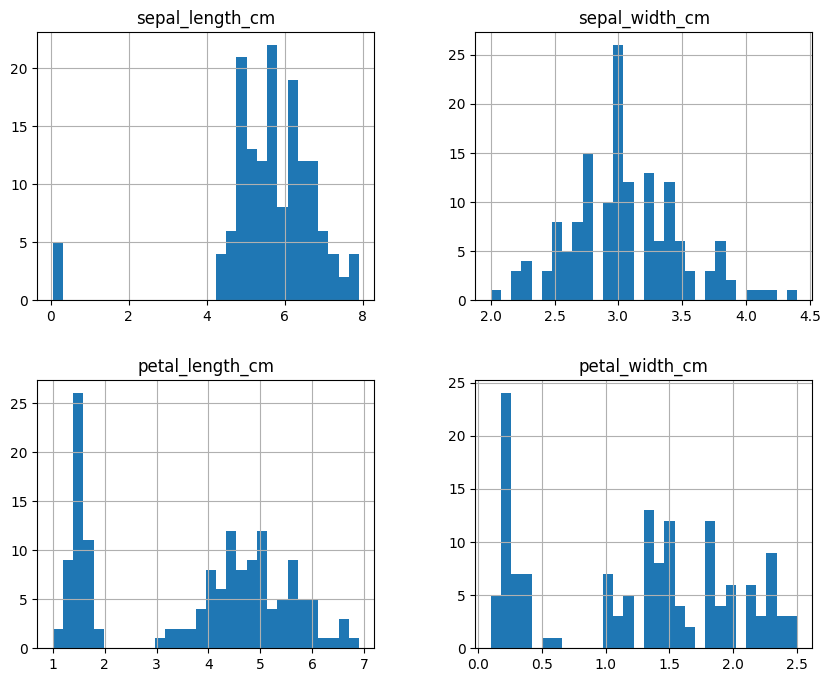

In [150]:
# Plot the histogram of the numerical features

irisdf.hist(bins = 30, figsize = (10,8))
plt.show()

There are some small-valued outlier for sepal_length_cm.

It's also notable that petal_length_cm and petal_width_cm are right skewed with many lengths that are small valued.

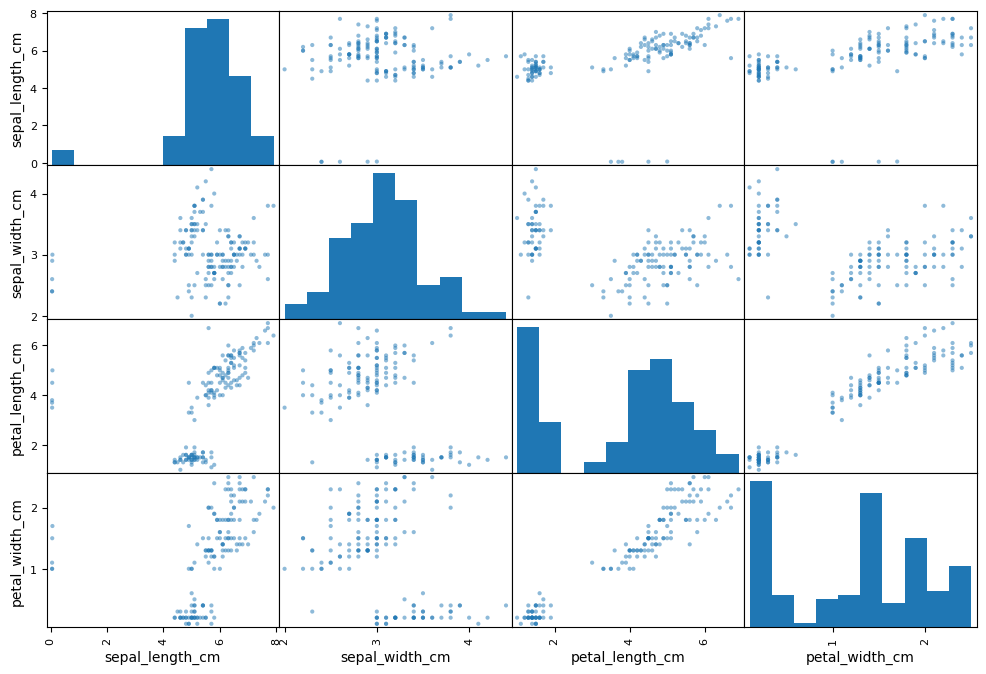

In [151]:
# Problem 4D
# Obtain scatter matrix
from pandas.plotting import scatter_matrix

attributes = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
scatter_matrix(irisdf[attributes], figsize = (12,8))
plt.show()

In [152]:
# Obtain the correlations among features and comment
corr_matrix = irisdf.corr(numeric_only=True)
corr_matrix

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.469734
sepal_width_cm,0.066091,1.000000,-0.419796,-0.348464
petal_length_cm,0.489083,-0.419796,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


There appears to be:
- Strong positive correlation between petal width and petal length.
- Almost no correlation between sepal width and sepal length.
- Moderatively negative correlation between sepal width and petal width, as well as sepal width and petal length.
- Moderatively positive correlations between sepal length and petal width, as well as sepal length and petal length.

In [153]:
# Problem 4E
# Drop the data points with NA in it

irisdf.dropna(inplace = True)
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [154]:
# Tidy up the data by renaming the “class” data point correctly.

irisdf = irisdf.rename(columns={'class':'species'})

print('List of Species:')
irisdf["species"].value_counts()

List of Species:


,count
species,
Iris-virginica,50
Iris-versicolor,45
Iris-setosa,44
versicolor,5
Iris-setossa,1


In [155]:
misnamed1 = (irisdf['species'] == 'versicolor')
irisdf.loc[misnamed1, 'species'] = 'Iris-versicolor'

misnamed2 = (irisdf['species'] == 'Iris-setossa')
irisdf.loc[misnamed2, 'species'] = 'Iris-setosa'

print('List of Species, Names Corrected:')
irisdf["species"].value_counts()

List of Species, Names Corrected:


,count
species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,45


In [156]:
# Remove the outliers: drop the 'Iris-setosa' rows with a sepal width less than 2.5 cm.

outliers = (irisdf['species'] == 'Iris-setosa') & (irisdf['sepal_width_cm'] < 2.5)
print('List of outliers:')
print(irisdf[outliers])
print('\n')

print('Data without outliers:')
irisdf = irisdf[~outliers]
irisdf

List of outliers:
    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
41              4.5             2.3              1.3             0.3   

        species  
41  Iris-setosa  


Data without outliers:


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [157]:
# One of the data collectors forgot to convert the sepal length for “Iris-versicolor” to cm, instead added the data as meters. Find those and convert them to cm.

tolerance = 1; # Based on histogram
unconverted = (irisdf['species'] == 'Iris-versicolor') & (irisdf['sepal_length_cm'] < tolerance)
print('List of unconverted:')
print(irisdf[unconverted])
print('\n')

print('Fixed conversions:')
irisdf.loc[unconverted, 'sepal_length_cm'] *= 100
print(irisdf[unconverted])

List of unconverted:
    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
77            0.067             3.0              5.0             1.7   
78            0.060             2.9              4.5             1.5   
79            0.057             2.6              3.5             1.0   
80            0.055             2.4              3.8             1.1   
81            0.055             2.4              3.7             1.0   

            species  
77  Iris-versicolor  
78  Iris-versicolor  
79  Iris-versicolor  
80  Iris-versicolor  
81  Iris-versicolor  


Fixed conversions:
    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
77              6.7             3.0              5.0             1.7   
78              6.0             2.9              4.5             1.5   
79              5.7             2.6              3.5             1.0   
80              5.5             2.4              3.8             1.1   
81              5.5             2

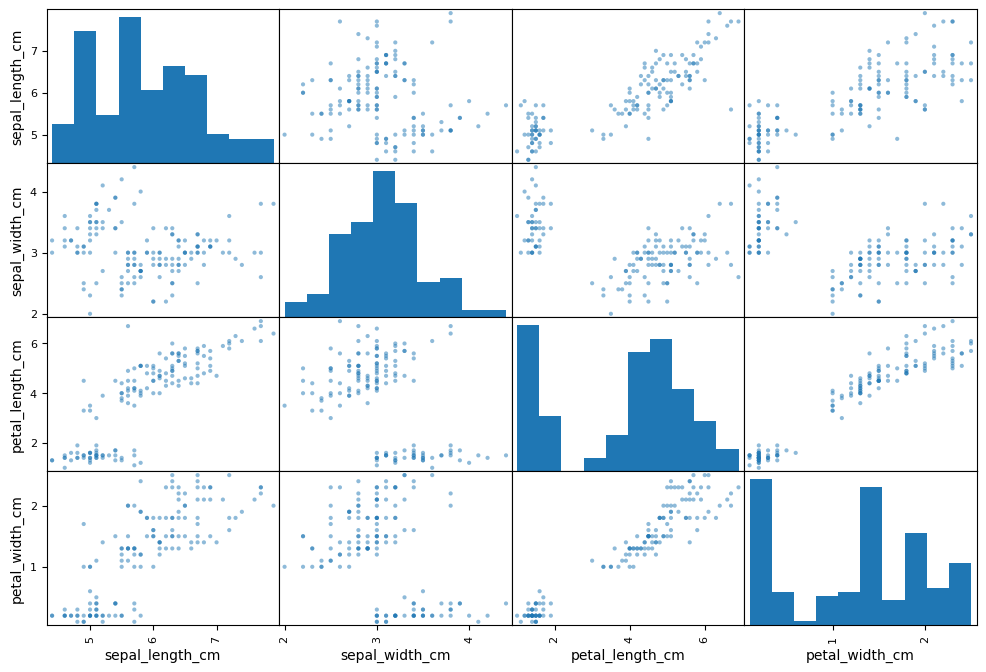

In [158]:
attributes = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
scatter_matrix(irisdf[attributes], figsize = (12,8))
plt.show()

With the outliers removed, the histograms are presenting a clearer picture.

In [159]:
# Handle the categorical variables
iris_cat = irisdf[['species']]
iris_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  144 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [160]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
iris_cat_1hot = cat_encoder.fit_transform(iris_cat)
iris_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 144 stored elements and shape (144, 3)>

In [161]:
iris_cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [162]:
cat_encoder.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [163]:
# Save the clean data into a new file.

irisdf.to_csv('iris-data-clean.csv')